#### Importing Libraries  

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline

In [2]:
import cv2
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [4]:
import random

In [5]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix

import tensorflow as tf 
import tensorflow.keras
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout , BatchNormalization

In [27]:

from numpy import unravel_index

In [70]:
import os 

### Taking a sample of 75 images for each alphabet from A-Z handwritten dataset  

In [6]:
data = pd.read_csv("D:/Aplhabet Recognition/archive/A_Z Handwritten Data.csv")

<h5> data_div[i] will store all rows for ith alphabet </h5>

In [7]:
data_div = [0 for i in range(26)]

In [9]:
%%time 

grouped = data.groupby(data['0'])
for i in range(26) :
    data_div[i] = grouped.get_group(i)

Wall time: 1.72 s


In [10]:
data_div[5]

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
67520,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
67521,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
67522,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
67523,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
67524,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68678,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
68679,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
68680,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
68681,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Now splitting my data in X and y  

In [11]:
%%time 

y_div = [0 for i in range(26)] 
for i in range(26) :
    data_div[i] = data_div[i].sample(n = 75)
    y_div[i] = data_div[i]['0']
    del data_div[i]['0']

Wall time: 446 ms
Compiler : 104 ms


In [12]:
data_div[8]

,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.10,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
82751,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
82355,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
82116,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
82211,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
82276,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81892,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
82395,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
82613,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
82170,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Now we are done with Image input . Now we'll perform data augmentation and create a 150 images for each alphabet 

In [13]:
def get_idg() :
    idg = ImageDataGenerator(
    rotation_range=random.randint(0,10),
    zoom_range = random.uniform(0,0.5), 
    fill_mode='constant', cval=255
    )
    
    return idg 

def get_idg_no() :
    idg = ImageDataGenerator(
    rotation_range= 0 
    )
    
    return idg 
    

In [14]:
%%time

image_data_aug  = [0 for i in range(26)] 
y_data_aug = [0 for i in range(26)] 

for i in range(26) :
    a ,ya = get_idg_no().flow(data_div[i].values.reshape(len(data_div[i]),28,28,1), y_div[i],batch_size=75).next()
    b , yb = get_idg().flow(data_div[i].values.reshape(len(data_div[i]),28,28,1), y_div[i],batch_size=75).next()
    #print(a.shape)
    a = a.reshape(75,28*28)
    b = b.reshape(75,28*28)
    a = pd.DataFrame(a)
    b = pd.DataFrame(b)
    ya = pd.DataFrame(ya)
    yb = pd.DataFrame(yb)
    #print(a)
    aug_2 = (a,b)
    y_data_aug[i] = [y_div[i] for j in range(2)]
    #print(aug_4_y)
    image_data_aug[i] =  pd.concat(aug_2, ignore_index = True)
    y_data_aug[i] = pd.concat(y_data_aug[i]  ,ignore_index = True)
    #print(y_data_aug[i])
    
    print(i)
    
    

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
Wall time: 639 ms


In [15]:
image_data_aug[0]

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
146,255.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,255.0
147,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0
148,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0


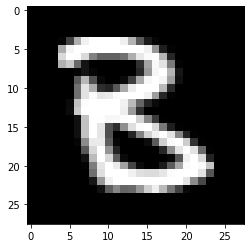

In [16]:
i_plot = image_data_aug[1].loc[1,:]
i_plot = np.array(i_plot)
plt.imshow(i_plot.reshape(28,28),cmap = 'gray')

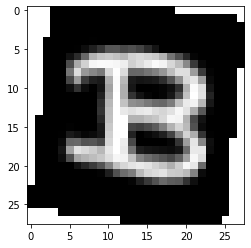

In [17]:
i_plot = image_data_aug[1].loc[79,:]
i_plot = np.array(i_plot)
plt.imshow(i_plot.reshape(28,28),cmap = 'gray')

### Training and Evaluation of Model  

In [18]:
pd_data = [0 for i in range(26)]
y_data = [0 for i in range(26)]

for i in range(26) :
    pd_data[i] = image_data_aug[i]
    y_data[i]  = y_data_aug[i]

In [19]:
X = pd.concat(pd_data)
y = pd.concat(y_data)

In [20]:
X = np.array(X)
y = np.array(y)

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify= y, shuffle=True)

In [22]:

X_train = X_train.reshape(-1,28,28,1)

X_test = X = X_test.reshape(-1,28,28,1)
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)


In [23]:
def my_model(width,height,channel) :
    model = Sequential()
    
    model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', activation ='relu', input_shape = (width,height,channel)))
    model.add(BatchNormalization())
    model.add(Conv2D(filters = 32, kernel_size = (3,3),padding = 'Same', activation ='relu'))
    model.add(BatchNormalization())
    model.add(MaxPool2D(pool_size=(2,2)))
    model.add(Dropout(0.20))
    
    model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', activation ='relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', activation ='relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', activation ='relu'))
    model.add(BatchNormalization())
    model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
    model.add(Dropout(0.20)) 
    
    model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same', activation ='relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same', activation ='relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same', activation ='relu'))
    model.add(BatchNormalization())
    model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
    model.add(Dropout(0.20)) 
    
    
    model.add(Flatten())
    model.add(Dense(512, activation = "relu"))
    model.add(BatchNormalization())
    model.add(Dropout(0.25))

    model.add(Dense(26, activation = "softmax"))
    
    
    return model
    
    

### If you want to train model again then can this following script but if you want to use my pre trained model then skip this section and see the next section 

In [73]:
model = my_model(28,28,1)

In [74]:
%%time 

model.compile(optimizer='adamax', loss = 'categorical_crossentropy', metrics=['accuracy'])

Wall time: 8.03 ms


<h5> To save my model in the specified checkpoint path </h5>

In [75]:

checkpoint_path = "cp1.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)
# Create a callback that saves the model's weights
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)

In [76]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=25, batch_size=64, shuffle=True,callbacks=[cp_callback])

Epoch 1/25
49/49 [==============================] - 14s 262ms/step - loss: 3.3950 - accuracy: 0.1375 - val_loss: 2.5864 - val_accuracy: 0.2128

Epoch 00001: saving model to cp1.ckpt
Epoch 2/25
49/49 [==============================] - 13s 261ms/step - loss: 1.4320 - accuracy: 0.5796 - val_loss: 1.3933 - val_accuracy: 0.6795

Epoch 00002: saving model to cp1.ckpt
Epoch 3/25
49/49 [==============================] - 13s 257ms/step - loss: 0.8495 - accuracy: 0.7461 - val_loss: 0.7554 - val_accuracy: 0.8141

Epoch 00003: saving model to cp1.ckpt
Epoch 4/25
49/49 [==============================] - 13s 266ms/step - loss: 0.5651 - accuracy: 0.8195 - val_loss: 0.4584 - val_accuracy: 0.8705

Epoch 00004: saving model to cp1.ckpt
Epoch 5/25
49/49 [==============================] - 14s 279ms/step - loss: 0.4505 - accuracy: 0.8625 - val_loss: 0.3228 - val_accuracy: 0.9090

Epoch 00005: saving model to cp1.ckpt
Epoch 6/25
49/49 [==============================] - 15s 294ms/step - loss: 0.3507 - accura

#### Using pre trained Model  

In [77]:
latest = tf.train.latest_checkpoint(checkpoint_dir)

In [78]:
print(latest)

cp1.ckpt


In [89]:
model2 = my_model(28,28,1)
model2.compile(optimizer='adamax', loss = 'categorical_crossentropy', metrics=['accuracy'])
model2.load_weights(latest)

In [85]:
def max_index(y_test) :
    ans = [0 for i in range(len(y_test))]
    for i in range(len(y_test)) :
        index = unravel_index(y_test[i].argmax(), y_test[i].shape)
        ans[i] = index[0] 
    return ans 

In [86]:
print(model2.predict_classes(X_test[:25]))
print(max_index(y_test[:25]))

C:\Users\JPG\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


[16  2  4 24 24  1  0 13  3 13 20 19  6 12 15  8  6 14 11 11  2 21 17  7
  6]
[16, 2, 4, 24, 24, 1, 7, 13, 3, 13, 20, 19, 6, 12, 15, 8, 18, 14, 11, 11, 2, 21, 17, 7, 6]


In [91]:
model2.evaluate(X_test,y_test)                    ##This is pretrained model 

25/25 [==============================] - 1s 22ms/step - loss: 0.0801 - accuracy: 0.9705


[0.08014322817325592, 0.9705128073692322]

In [92]:
model.evaluate(X_test,y_test)                      #### This is trained model (Currently trained)

25/25 [==============================] - 1s 21ms/step - loss: 0.0801 - accuracy: 0.9705


[0.08014322817325592, 0.9705128073692322]